AMAZON SENTIMENT ANALYSIS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('tableau-colorblind10')
import nltk


In [3]:
# Reading csv file
df = pd.read_csv(r'/Users/raghul/Downloads/archive (10)/Musical_instruments_reviews.csv')

1. Exploring the data set

In [6]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [9]:
# Amazon review distribution
df['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [10]:
df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='Count'>

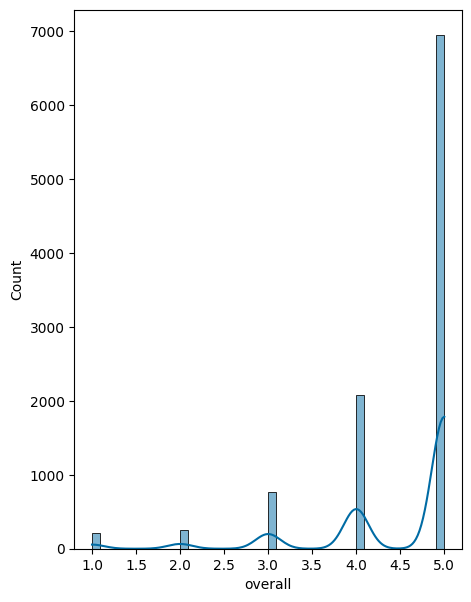

In [12]:
plt.figure(figsize=[5,7])
sns.histplot(df['overall'],kde=True)

In [15]:
# dropping unwanted columns
df2 =df.drop(['unixReviewTime','reviewTime','helpful'],axis=1)
df2

,reviewerID,asin,reviewerName,reviewText,overall,summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5.0,good
1,A14VAT5EAX3D9S,1384719342,Jake,The product does exactly as it should and is q...,5.0,Jake
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5.0,It Does The Job Well
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"Great, just as expected. Thank to all.",5.0,Five Stars
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


2. VADER SENTIMENT ANALYSIS APPROACH

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm
sia =SentimentIntensityAnalyzer()

In [21]:
# example
sia.polarity_scores('i am sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [ ]:
result = {}
for i,row in tqdm(df2.iterrows(), total=len(df2)):
    text = str(row['reviewText'])
    ID = row['reviewerID']
    result[ID] = sia.polarity_scores(text)

In [132]:
vader_result = pd.DataFrame(result).T


In [142]:
# merging with data frame
vader_result = vader_result.rename_axis('reviewerID').reset_index()
vader_result = vader_result.merge(df2, how = 'left')

In [143]:
vader_result

,reviewerID,neg,neu,pos,compound,asin,reviewerName,reviewText,overall,summary
0,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5.0,good
1,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002F7K7Y,"cassandra tu ""Yeah, well, that's just like, u...",I've been trying out different gauges to exper...,5.0,Get these
2,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002GZM00,"cassandra tu ""Yeah, well, that's just like, u...",I've got 5 effects hooked up to this thing. It...,5.0,5 Hooked up
3,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002IAJ56,"cassandra tu ""Yeah, well, that's just like, u...",Defiantly a space saver. I can put all of my e...,5.0,Space saver
4,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002PBS6S,"cassandra tu ""Yeah, well, that's just like, u...",This is my first time using a hybrid mix and t...,5.0,Good Mix
...,...,...,...,...,...,...,...,...,...,...
10256,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B008BPI2HE,caffeinebrain,Knowing nothing about guitars except that my h...,5.0,A+ From My Husband
10257,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00AQBT3EW,caffeinebrain,I'm certainly not the musician in the family a...,5.0,High Quality Guitar Strings
10258,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00IZCSW3M,coffeebrain,I ordered these for my husband the guitar play...,5.0,"Guitar Strings, Light"
10259,A3A7Y3TSPPZU9T,0.000,0.655,0.345,0.9022,B00J4TBMVO,coffeebrain,"I ordered this for my husband, the musician. H...",5.0,Great Strings


<Figure size 1000x600 with 0 Axes>

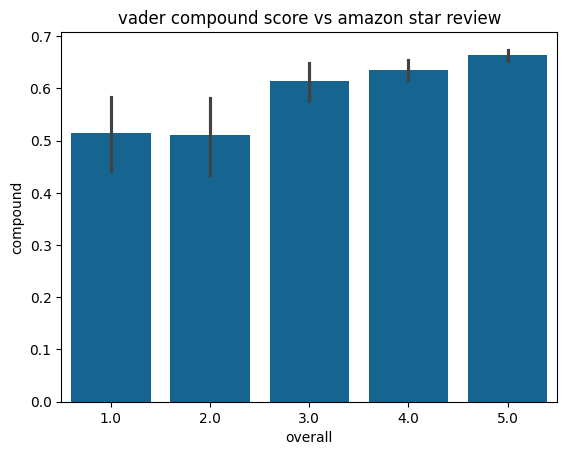

<Figure size 1000x600 with 0 Axes>

In [59]:
sns.barplot(data=vader_result,x = 'overall',y='compound')
plt.title('vader compound score vs amazon star review')
plt.figure(figsize=(10, 6))


Text(0.5, 1.0, 'Negative Score vs Amazon Star Review')

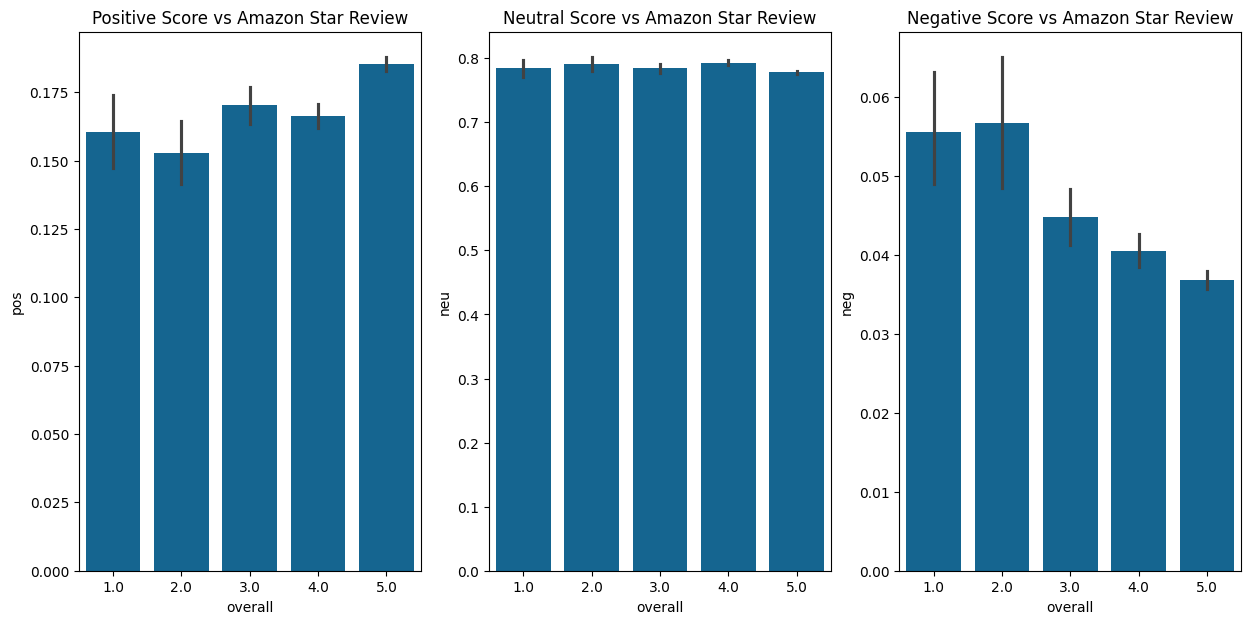

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))


sns.barplot(data=vader_result, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vader_result, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vader_result, x='overall', y='neg', ax=axs[2])

axs[0].set_title('Positive Score vs Amazon Star Review')
axs[1].set_title('Neutral Score vs Amazon Star Review')
axs[2].set_title('Negative Score vs Amazon Star Review')

3. HUGGING FACE - BERT SENTIMENT ANALYSIS APPROACH

In [ ]:

!pip3 install torch torchvision torchaudio

In [68]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch


In [ ]:
# model initialization
token = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [76]:
# example
tokens= token.encode('i am sad',return_tensors='pt')
results = model(tokens)
int(torch.argmax(results.logits))+1

1

In [125]:
# applying bert model on dataset
def bert_score(review):
    tokens =token.encode(review,return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

In [ ]:
op = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = str(row['reviewText'])
        ID = row['reviewerID']
        op[ID] = bert_score(text)
    except RuntimeError:
        print(f'broke for {ID}')
    
    

  
print (op)  
    

In [136]:
print (op) 

{'A2IBPI20UZIR0U': 4, 'A14VAT5EAX3D9S': 5, 'A195EZSQDW3E21': 4, 'A2C00NNG1ZQQG2': 5, 'A94QU4C90B1AX': 5, 'A2A039TZMZHH9Y': 5, 'A1UPZM995ZAH90': 4, 'AJNFQI3YR6XJ5': 2, 'A3M1PLEYNDEYO8': 4, 'AMNTZU1YQN1TH': 5, 'A2NYK9KWFMJV4Y': 4, 'A35QFQI0M46LWO': 5, 'A2NIT6BKW11XJQ': 5, 'A1C0O09LOLVI39': 4, 'A17SLR18TUMULM': 5, 'A2PD27UKAD3Q00': 5, 'AKSFZ4G1AXYFC': 3, 'A67OJZLHBBUQ9': 5, 'A2EZWZ8MBEDOLN': 5, 'A1CL807EOUPVP1': 4, 'A1GMWTGXW682GB': 4, 'A2G12DY50U700V': 5, 'A3E0CF25A7LD2': 4, 'A2W3CLAYZLDPTV': 5, 'A398X9POBHK69N': 5, 'AXWB93VKVML6K': 4, 'A2FZ4Z0UFA1OR8': 4, 'AXP9CF1UTFRSU': 4, 'A2CCGGDGZ694CT': 5, 'A27DR1VO079F1V': 3, 'A1LQC225SE8UNI': 5, 'AU9BPT3Y3K6J4': 5, 'A14Z9LAETO21KL': 4, 'A2074KEJGRYJV4': 4, 'A7TRK2GG6BHWD': 5, 'A319B090A2POEB': 3, 'A396ELNTQDFYPO': 2, 'A17CU1D2CWXOHB': 5, 'A1S0HTDO0P4N5V': 1, 'A3DWQW2L39RB1S': 1, 'AQQ91U1U4YKDF': 5, 'AA5TINW2RJ195': 5, 'ABC68JUCPTVOE': 4, 'A3W2E6S24BTXXK': 5, 'A3872Y2XH0YDX1': 5, 'A13A81NN0NRD1S': 5, 'A1EUO0BU72JR7T': 4, 'A1H4WSC8JWS59N': 5, 'A3O

In [140]:
BERT_SCORE = pd.DataFrame(list(op.items()), columns=['reviewerID', 'BERT_score'])

BERT_SCORE

,reviewerID,BERT_score
0,A2IBPI20UZIR0U,4
1,A14VAT5EAX3D9S,5
2,A195EZSQDW3E21,4
3,A2C00NNG1ZQQG2,5
4,A94QU4C90B1AX,5
...,...,...
1422,A27EWIL4YBWTA0,4
1423,A3EYCAYIIBDXUF,4
1424,A3HH71P93ZWAMB,5
1425,A3A7Y3TSPPZU9T,5


In [147]:
# merging with dataframe
BERT_SCORE = BERT_SCORE.merge(df2, how = 'left')
BERT_SCORE.sample(20)

,reviewerID,BERT_score,asin,reviewerName,reviewText,overall,summary
3398,A1IJUUNPU7L6LA,5,B000OR2QX8,"Don ""On The Upper Cumberland""","My bass-playing has gone on for 50 years,...an...",5.0,Just the string type for me
1996,A1S7QABO64Z554,4,B0002E1G5C,"Bob B ""Bob B""",I was a bit concerned about this tool after re...,5.0,Great Tool for guitar owners
3537,A1YP96MT6W9FTB,4,B000QGCJU2,JPfromOH,"Although this is hardly a high-end microphone,...",4.0,Decent Microphone and Stand Combo
4510,A1NPG8GYIXYIVY,5,B005VLWHP4,David Y.,I have used these and I noticed this capo is a...,5.0,Great Capo!
7468,A2Q6KC2KU2T0OL,4,B0002E3CHC,A. Tapia,this are probably the best sounding guitar str...,4.0,OK strings for the price
9081,A2IMZNPSJGB2HQ,4,B0002KZIVY,Fernando Valenzuela,One of the my favorite thigns about Strats is ...,5.0,Nice vintage look
6565,A2AWJRUEY9IG4B,5,B0002E1O2M,TonyTee,These are perfect. Hard to beat strings. They ...,4.0,Great guitar strings
4307,A3MTR7P9PYAALX,5,B0002D0CGM,Craig Richard Gillette,I only use Dunlops. For a number of reasons. F...,5.0,Dunlops rock!
7916,A18DTTRCYR8TD7,5,B0002F7IIK,Peter Dillmann,I love these things. They hold your guitars in...,5.0,Works and looks great!
7596,A3NRNJN4GAQ2V6,4,B002VA464S,RICHARD A DINSMORE,"Yes, you can make perfectly good pod casts and...",5.0,"Easy To Use, Sounds Great"


<Figure size 1000x600 with 0 Axes>

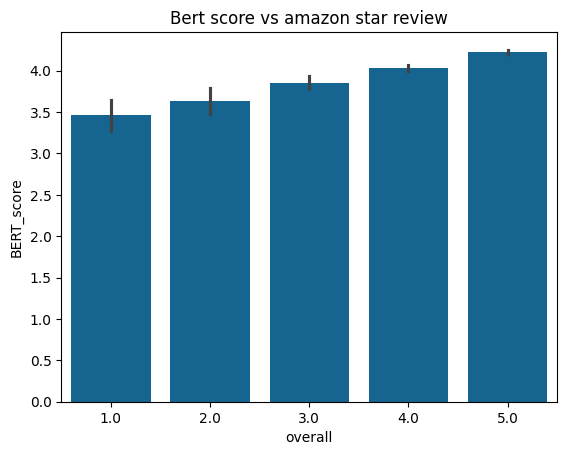

<Figure size 1000x600 with 0 Axes>

In [146]:
sns.barplot(data=BERT_SCORE,x = 'overall',y='BERT_score')
plt.title('Bert score vs amazon star review')
plt.figure(figsize=(10, 6))

4. HUGGING FACE - ROBERTA SENTIMENT ANALYSIS APPROACH

In [148]:
# roberta model intialization
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')
roberta_model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [154]:
# example
ip = tokenizer.encode('i am sad',return_tensors='pt')
o_p = roberta_model(ip)
o_p

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.1746,  0.1882, -1.5985]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [215]:
from torch import softmax
# applying roberta model on dataset

def roberta(review):
   inputs = tokenizer.encode(review, return_tensors='pt')
  
   outputs = roberta_model(inputs)
  
   return int(torch.argmax(outputs.logits)) 
    
   
    

In [216]:
out = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = str(row['reviewText'])
        ID = row['reviewerID']
        out[ID] = roberta(text)
    except RuntimeError:
        print(f'broke for {ID}')
    except IndexError:
        print(f'broke for {ID}')
    

  0%|          | 0/10261 [00:00<?, ?it/s]

broke for A2MR43RDPZX3J
broke for A2KI91IR3RA7D0
broke for A2KI91IR3RA7D0
broke for A203OCQQ12MAVT
broke for A20L3BCRCICRSQ
broke for A15TYOEWBQYF0X
broke for A2MMH4O7EDNLCV
broke for A2RIQKV4OOXME1
broke for A3MRBUCGH66JTY
broke for A2ZGEV4CTSCTIZ
broke for A23AKO4BZLZ8DE
broke for A22Z554ZQ8NFPC
broke for A27L5L6I7OSV5B
broke for ADH0O8UVJOT10
broke for A1EX4410F46C8O
broke for A3FW4THIMBIN6V
broke for A3BMI7VGJT60Y7
broke for A8ANJNZAZQ6IQ
broke for A356RFKNIG043B
broke for ALHC64J88LVWO
broke for A356RFKNIG043B
broke for A3JUQ2E799OC5B
broke for A3EXWV8FNSSFL6
broke for A3AOPVQ7EZHTWA
broke for A2XXBZPQT5EXHV
broke for A2KI91IR3RA7D0
broke for A1QDSJZQWJZOL1
broke for A3GH47E9FF8WN1
broke for A1XNCV67JBJVF7
broke for A1SCWHXAB2ZK7N
broke for A3GH47E9FF8WN1
broke for A2VH0UT5EQFB6P
broke for A6FIAB28IS79
broke for A3EXWV8FNSSFL6
broke for A1URXSRV6WDHVY
broke for A2WA8TDCTGUADI
broke for A2101DHHDMZ93X
broke for A3FQ9WYUHG9CD
broke for A2C46HQIZLYJUC
broke for A15TYOEWBQYF0X
broke f

In [217]:
out

{'A2IBPI20UZIR0U': 2,
 'A14VAT5EAX3D9S': 2,
 'A195EZSQDW3E21': 0,
 'A2C00NNG1ZQQG2': 2,
 'A94QU4C90B1AX': 2,
 'A2A039TZMZHH9Y': 2,
 'A1UPZM995ZAH90': 0,
 'AJNFQI3YR6XJ5': 1,
 'A3M1PLEYNDEYO8': 2,
 'AMNTZU1YQN1TH': 2,
 'A2NYK9KWFMJV4Y': 2,
 'A35QFQI0M46LWO': 2,
 'A2NIT6BKW11XJQ': 2,
 'A1C0O09LOLVI39': 2,
 'A17SLR18TUMULM': 2,
 'A2PD27UKAD3Q00': 2,
 'AKSFZ4G1AXYFC': 2,
 'A67OJZLHBBUQ9': 2,
 'A2EZWZ8MBEDOLN': 2,
 'A1CL807EOUPVP1': 2,
 'A1GMWTGXW682GB': 2,
 'A2G12DY50U700V': 2,
 'A3E0CF25A7LD2': 1,
 'A2W3CLAYZLDPTV': 1,
 'A398X9POBHK69N': 2,
 'AXWB93VKVML6K': 2,
 'A2FZ4Z0UFA1OR8': 0,
 'AXP9CF1UTFRSU': 1,
 'A2CCGGDGZ694CT': 2,
 'A27DR1VO079F1V': 1,
 'A1LQC225SE8UNI': 2,
 'AU9BPT3Y3K6J4': 2,
 'A14Z9LAETO21KL': 1,
 'A2074KEJGRYJV4': 2,
 'A7TRK2GG6BHWD': 2,
 'A319B090A2POEB': 0,
 'A396ELNTQDFYPO': 0,
 'A17CU1D2CWXOHB': 2,
 'A1S0HTDO0P4N5V': 0,
 'A3DWQW2L39RB1S': 0,
 'AQQ91U1U4YKDF': 2,
 'AA5TINW2RJ195': 2,
 'ABC68JUCPTVOE': 2,
 'A3W2E6S24BTXXK': 2,
 'A3872Y2XH0YDX1': 2,
 'A13A81NN0NRD1S': 2,
 

In [218]:
ROBERTA_SCORE = pd.DataFrame(list(out.items()), columns=['reviewerID', 'ROBERTA_score  0 - negative 1 - neutral 2 -positive'])

ROBERTA_SCORE

,reviewerID,ROBERTA_score 0 - negative 1 - neutral 2 -positive
0,A2IBPI20UZIR0U,2
1,A14VAT5EAX3D9S,2
2,A195EZSQDW3E21,0
3,A2C00NNG1ZQQG2,2
4,A94QU4C90B1AX,2
...,...,...
1422,A27EWIL4YBWTA0,2
1423,A3EYCAYIIBDXUF,1
1424,A3HH71P93ZWAMB,2
1425,A3A7Y3TSPPZU9T,2


In [221]:
# merging with data frame
ROBERTA_SCORE = ROBERTA_SCORE.merge(df2, how = 'left')
ROBERTA_SCORE.sample(20)

,reviewerID,ROBERTA_score 0 - negative 1 - neutral 2 -positive,asin,reviewerName,reviewText,overall,summary
8196,A200D8BOPMR35S,2,B0002GX5NG,"Earl D. Shaffer ""OracleMan""",I am glad I bought this. It is exactly what wa...,4.0,"Get ""On Stage Microphone 13-inch Gooseneck, Bl..."
4935,A6VXZ1EEPRTLV,2,B003B01QR2,trebe,I normally use Dunlop&#8217;s 0.60mm nylon pic...,4.0,"provides a firm grip, but more pliable than th..."
5735,A1RGF9CS1V8O14,2,B000AC6DVS,Josiah H.,"Erm, it does what it say it would do. The nice...",5.0,Dampit Guitar Humidifier Super
1335,A1M957IA3QNX7X,2,B000KGYAYQ,Kyle D.,I have a pretty weird pedalboard set-up involv...,5.0,Does what I need it to do.
4844,AFGRMORWY2QNX,2,B005BSOVRY,R. Heisler,"OK, I just got this mic in the mail a few hour...",5.0,Great bang for the buck!!!
94,AMNTZU1YQN1TH,2,B00004Y2UT,Kurt Robair,Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market
6978,A2RCV60MNI5VTV,0,B0002E2G24,Paparaptor,"Recently, I was building a Telecaster project....",4.0,Great for a modified Telecaster
2419,A2D0F87RY5YMHN,2,B0002E1O2C,Levis Ouellet,Lately I have been experimenting with various ...,4.0,Experimenting With Various Acoustic Strings
8756,A36378CQKPA2G,2,B0002GZM00,Carlo Verdi,This original plug fits the purpose perfectly!...,5.0,Best plugs for One Spot!
6914,A256QA9N8ZK520,2,B0002Z2CZY,David Aric Jones,"I love that these eliminate pick noise, but do...",5.0,Go for Medium or Hard on these


<Figure size 1000x600 with 0 Axes>

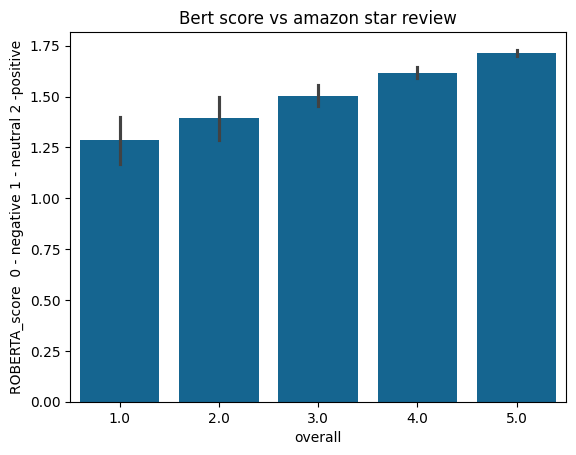

<Figure size 1000x600 with 0 Axes>

In [222]:
sns.barplot(data=ROBERTA_SCORE,x = 'overall',y='ROBERTA_score  0 - negative 1 - neutral 2 -positive')
plt.title('Bert score vs amazon star review')
plt.figure(figsize=(10, 6))

5. COMPARING ALL THE MODEL'S SCORE WITH THE OVERALL(ACTUAL) SCORE

In [243]:
# creating final data frame

final = vader_result.merge(BERT_SCORE, how = 'left')
final = final.merge(ROBERTA_SCORE , how='left')
final = final.drop(['asin','reviewerName','summary'],axis=1)
reorder = ['reviewerID', 'reviewText','overall', 'neg','neu','pos','compound','BERT_score','ROBERTA_score  0 - negative 1 - neutral 2 -positive']
final_reordered = final[reorder]

final_reordered =final_reordered.rename(columns={'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos','compound':'vader_compound'})
final_reordered.sample(20)

,reviewerID,reviewText,overall,vader_neg,vader_neu,vader_pos,vader_compound,BERT_score,ROBERTA_score 0 - negative 1 - neutral 2 -positive
6560,A1Q94IXHEGQDV7,"As with any Daddario or planet waves product, ...",5.0,0.038,0.676,0.285,0.9226,4.0,2.0
6017,A2X68NVO0SGCMC,I use these strings on my practice guitar beca...,5.0,0.082,0.792,0.127,0.3127,5.0,2.0
2052,AZJPNK73JF3XP,This gets the job done but because it is light...,4.0,0.145,0.855,0.000,-0.3400,4.0,2.0
780,A1FHOW9NVOH8XR,Hosa Cable GTR210 Guitar Instrument Cable - 10...,5.0,0.000,0.699,0.301,0.9451,5.0,2.0
1084,A3JUQ2E799OC5B,"These cables work well in my jam space, they d...",5.0,0.136,0.808,0.056,-0.9544,4.0,1.0
3245,A3D42ZX96FA6EW,...thing is great for multi-pedal use! This i...,5.0,0.050,0.804,0.146,0.7184,4.0,2.0
9663,A1WJBJUQ24G8BU,Unlike those who have complained that they dry...,5.0,0.031,0.835,0.134,0.9899,2.0,1.0
8023,A2BHAEL2Q4HR4A,"I've purchased other types, but I keep coming ...",5.0,0.000,0.743,0.257,0.7082,5.0,2.0
6787,A7IBOCJ0K4V8C,This tuner is tiny and works as advertised to ...,4.0,0.070,0.860,0.070,0.2566,1.0,2.0
434,A396ELNTQDFYPO,I had some band mates that did not seem to res...,5.0,0.032,0.877,0.092,0.4850,2.0,0.0


Text(0.5, 1.0, 'ROBERTA_score 0 - negative 1 - neutral 2 -positive vs Amazon Star Review')

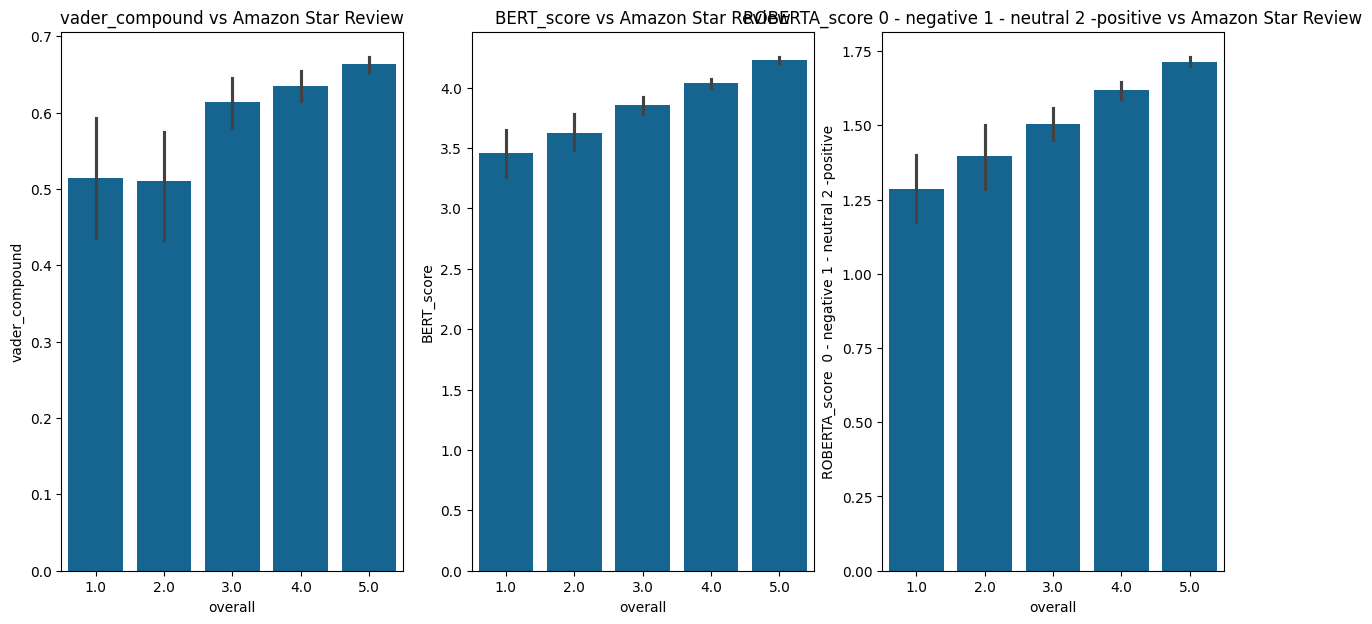

In [245]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))


sns.barplot(data=final_reordered, x='overall', y='vader_compound', ax=axs[0])
sns.barplot(data=final_reordered, x='overall', y='BERT_score', ax=axs[1])
sns.barplot(data=final_reordered, x='overall', y='ROBERTA_score  0 - negative 1 - neutral 2 -positive', ax=axs[2])

axs[0].set_title('vader_compound vs Amazon Star Review')
axs[1].set_title('BERT_score vs Amazon Star Review')
axs[2].set_title('ROBERTA_score 0 - negative 1 - neutral 2 -positive vs Amazon Star Review')

6. RESULT

Based on analysis of the musical instruments reviews dataset, the RoBERTa model demonstrated superior performance in predicting sentiments when compared to BERT and VADER.VADER showed the least favorable results in this particular comparison.